In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import random as rd
import math
from IPython import display

In [2]:
# parâmetros
@nb.njit
def cria_sistema(N):
    num_cidades = N

    coords_x = np.zeros(num_cidades)
    coords_y = np.zeros(num_cidades)
    caminho = np.zeros(num_cidades, dtype=np.int16)

    for i in range(num_cidades):
        coords_x[i] = rd.random()
        coords_y[i] = rd.random()
        caminho[i] = i

    # cálcula de distâncias
    distancias = np.zeros((num_cidades,num_cidades))

    for i in range(0,num_cidades):
        for j in range(i+1,num_cidades):
            distancias[i,j] = (coords_x[i] - coords_x[j]) * (coords_x[i] - coords_x[j]) + (coords_y[i] - coords_y[j]) * (coords_y[i] - coords_y[j])
            distancias[i,j] = np.sqrt(distancias[i,j])
            distancias[j,i] = distancias[i,j]
            
    return coords_x, coords_y, caminho, distancias

In [3]:
#"energia" do sistema
@nb.njit
def energia(caminho):
    num_cidades = len(caminho)
    ener = 0
    for i in range(num_cidades-1):
        ener += distancias[caminho[i],caminho[i+1]]
    ener += distancias[caminho[0],caminho[num_cidades-1]]
    
    return ener

In [4]:
# constrói novo caminho e calcula a diferença de energias entre a configuração antiga e a nova
@nb.njit
def novo_caminho(caminho):
    ncaminho = np.zeros(num_cidades,dtype=np.int16)

    i=np.random.randint(num_cidades)
    j=i

    while j==i:             # escolhe j de forma que i ≠ j
        j=np.random.randint(num_cidades)
        if i>j:
            ini = j
            fim = i
        else:
            ini = i
            fim = j

    for k in range(num_cidades):
        if k >= ini and k <= fim:
            ncaminho[k] = caminho[fim-k+ini]
        else:
            ncaminho[k] = caminho[k]

    de2 = energia(ncaminho) - energia(caminho)
    return de2, ncaminho

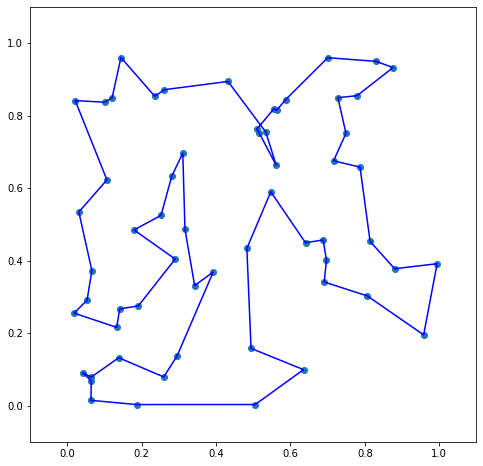

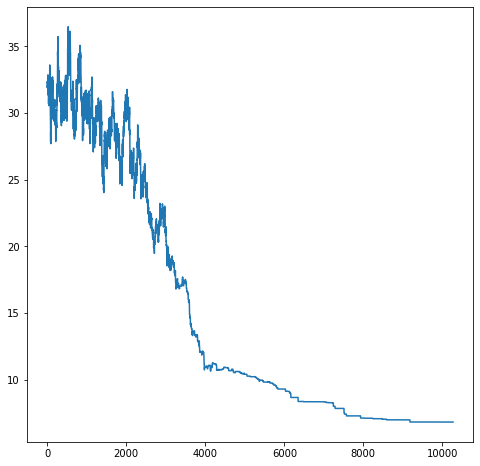

In [5]:
num_cidades = 60
T = 5
T_f = 0.0001
dt = 0.9
f = 100
coords_x = np.zeros(num_cidades)
coords_y = np.zeros(num_cidades)
caminho = np.zeros(num_cidades, dtype=np.int16)
ncaminho = np.zeros(num_cidades, dtype=np.int16)
distancias = np.zeros((num_cidades,num_cidades))

steps = int(math.log((T_f/T),dt)*f)+1
energias = np.zeros(steps+1)

#simulação
coords_x, coords_y, caminho, distancias = cria_sistema(num_cidades)
energias[0] = energia(caminho)

for i in range(1,steps+1):
    de, ncaminho = novo_caminho(caminho)
    if de > 0:
        number = rd.random()
        if number < np.exp(-de/T):
            caminho = ncaminho
    else:
        caminho = ncaminho
    energias[i] = energia(caminho)
        
    plotar_y = np.zeros(num_cidades)
    plotar_x = np.zeros(num_cidades)
    for j in range(num_cidades):    
        plotar_x[j] = coords_x[caminho[j]]
        plotar_y[j] = coords_y[caminho[j]]

    if i%f == 0:
        T = T*dt
    
    if i%(int(steps/200)) == 0: 
        plt.figure(figsize=(8,8))
        plt.scatter(coords_x,coords_y)
        plt.xlim(-0.1,1.1)
        plt.ylim(-0.1,1.1)
        plt.plot(plotar_x,plotar_y,color='b')
        plt.plot([plotar_x[-1],plotar_x[0]],[plotar_y[-1],plotar_y[0]],color='b')
        plt.show()
        display.clear_output(wait=True)
        

plt.figure(figsize=(8,8))
plt.scatter(coords_x,coords_y)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.plot(plotar_x,plotar_y,color='b')
plt.plot([plotar_x[-1],plotar_x[0]],[plotar_y[-1],plotar_y[0]],color='b')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(energias)
plt.show()

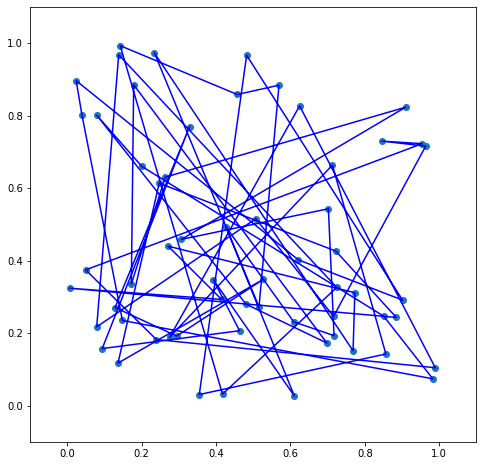

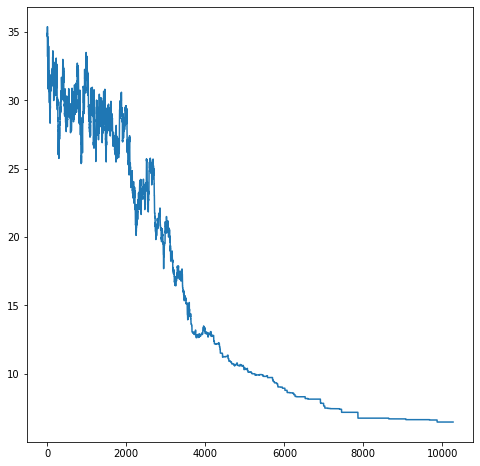

In [30]:
num_cidades = 60
T = 5
T_f = 0.0001
dt = 0.9
f = 100
coords_x = np.zeros(num_cidades)
coords_y = np.zeros(num_cidades)
caminho = np.zeros(num_cidades, dtype=np.int16)
ncaminho = np.zeros(num_cidades, dtype=np.int16)
distancias = np.zeros((num_cidades,num_cidades))

steps = int(math.log((T_f/T),dt)*f)+1

for _ in range(1000):
    np.random.shuffle(ncaminho)
    if energia(ncaminho) < energia(caminho):
        caminho = ncaminho
        
energias = np.zeros(steps+1)

#simulação
coords_x, coords_y, caminho, distancias = cria_sistema(num_cidades)
energias[0] = energia(caminho)

for i in range(1,steps+1):
    de, ncaminho = novo_caminho(caminho)
    if de > 0:
        number = rd.random()
        if number < np.exp(-de/T):
            caminho = ncaminho
    else:
        caminho = ncaminho
    energias[i] = energia(caminho)
        
    plotar_y = np.zeros(num_cidades)
    plotar_x = np.zeros(num_cidades)
    for j in range(num_cidades):    
        plotar_x[j] = coords_x[caminho[j]]
        plotar_y[j] = coords_y[caminho[j]]

    if i%f == 0:
        T = T*dt
    
    if i%(int(steps/200)) == 0: 
        plt.figure(figsize=(8,8))
        plt.scatter(coords_x,coords_y)
        plt.xlim(-0.1,1.1)
        plt.ylim(-0.1,1.1)
        plt.plot(plotar_x,plotar_y,color='b')
        plt.plot([plotar_x[-1],plotar_x[0]],[plotar_y[-1],plotar_y[0]],color='b')
        plt.show()
        display.clear_output(wait=True)
        

plt.figure(figsize=(8,8))
plt.scatter(coords_x,coords_y)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.plot(plotar_x,plotar_y,color='b')
plt.plot([plotar_x[-1],plotar_x[0]],[plotar_y[-1],plotar_y[0]],color='b')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(energias)
plt.show()